## Метод главных компонент

### План

1. Напоминание про проблему мультколлинеарности 
2. Метод главных компонент
3. Примеры с уменьшением количества признаков
    1. Повторяющийся признак
    2. Обрезка лишних признаков
4. Пример с сжатием изображения

### Проблема мультколлинеарности

Напомним формулировку задачу регрессии (семинар 1.2).

Пусть имеем конечный набор точек $\left\{\left(x_i, y_i\right)\right\}_{i=1}^N$, причём  $x_i \in \mathbb{R}^m, y_i \in \mathbb{R}$. Хотим найти функцию $\check{y}$, наилучшим образом аппроксимирующий данный набор точек.

"Наилучшим" в плане какой-либо функции ошибки (Loss). Самой простой и широко-используемой является средний квадрат отклонений (MSE)

$$
MSE = \mathcal{L}\left(\check{y}_i, y_i\right)=\frac{1}{N} \sum_{i=1}^N\left(\check{y}_i-y_i\right)^2
$$

Также используется RSS - суммарный квадрат отклонений

$$
RSS = \sum_{i=1}^N\left(\check{y}_i-y_i\right)^2 = MSE \cdot N
$$

Функцию $\check{y}$ мы искали среди семейства линейных функций. Вводя матрицу "объекты-признаки":

$$
X=\left(\begin{array}{c}
x_1 \\
x_2 \\
\cdots \\
x_N
\end{array}\right)=\left(\begin{array}{ccc}
x_1^1 & \cdots & x_m^1 \\
\vdots & \ddots & \vdots \\
x_1^N & \cdots & x_m^N
\end{array}\right)
$$

наша модель выглядела как линейная комбинация столбцов этой матрицы с коэффициентами $w$:

$$
\check{y}_i=w_1 \cdot x_1^{:}+\cdots+w_m \cdot x_m^:=X \cdot\left(\begin{array}{c}
w_1 \\
\cdots \\
w_m
\end{array}\right)=X_{ij} \cdot w_j
$$

Также мы аналитически показали, что при выборе MSE или RSS, их минимизация достигается на столбце коэффициентов:

$$
\mathrm{W}_{\text {best }}=\left(\mathrm{X}^{\mathrm{T}} \cdot \mathrm{X}\right)^{-1} \cdot \mathrm{X}^{\mathrm{T}} \cdot \mathrm{Y}
$$

При выборе другого LOSSа мы должны находить этот столбец наилучших коэффициентов методом градиентного спуска.

В то же время практически возникает некоторое количество проблем, связанных с этим методом решения задачи регрессии, которые мы постарались решить на прошлом семинаре (все эти проблемы остаются в силе и для нахождения решения методом градиентного спуска):

- Мультиколлинеарность признаков (столбцы матрицы Х линейно зависимы)
- Сложность расчетов
- Переобучение

Решали мы эти проблемы с помощью регуляризации. Сегодня же попробуем рассмотреть другой подход к улучшению нашего подхода, основанный на отбрасывании ненужных данных, или по научному, на __методе главных компонент__. 

### Метод главных компонент

Вспомним сингулярное разложение

![original image](https://cdn.mathpix.com/snip/images/hT4mrYdCdSarZLNfsyODsPifVaxqorpPD2r530AsbFU.original.fullsize.png)



- $r=\operatorname{rank}(A)$
  
- $U, V$ - унитарные ($U^{*}U=E$)
  
- $\sigma_1 \geq \ldots \geq \sigma_r>0$ - ненулевые _сингулярные_ числа. Для эрмитовых матриц равны модулям собственных чисел.

- Столбцы $U, V$ - _сингулярные_ вектора.

- Существует всегда.

Note: SVD также может быть определена для  $U \in \mathbb{C}^{m \times p}$, $\Sigma \in \mathbb{R}^{p \times p}$ и $V \in \mathbb{C}^{n \times p}, p=\min \{n . m\}$ - она нам сегодня и пригодится.

Идея метода главных компонент состоит в переходе в матрице объекты-признаки $X$ к новым координатам $\widetilde{z}$ (в которой матрицу объекты признаки будет записывать $\widetilde{Z}$), в которых признаки "максимально различимы" - в осях собственных векторов $X^TX$. Более того, мы можем даже выкинуть признаки, которым соответствуют наименьшие собственные (сингулярные) т.к. они наимешим образом влияют на определение итоговой регрессии.

Действительно, никто нам не мешает переходить в новые координаты $Z$, используя какое-либо ортогональное преобразование

$$
Z=X \cdot U, \quad \quad \text{где} U \text{- унитарная}
$$

Вспоминая сингулярное разложение,

$$
X=\underbrace{V}_{(N, m)} \cdot \underbrace{\sqrt{\Lambda}}_{(m, m)} \cdot \underbrace{U^{T}}_{(m, N)}=V\left(\begin{array}{ccc}
\sqrt{\lambda_1} & & \\
& \ddots & &  \\
& & &\ddots & \\
& & & & \sqrt{\lambda_m}
\end{array}\right) U^{T}, \quad \text{где } U, V \text{- унитарные, и} \lambda_1 \geqslant \lambda_2 \geqslant \lambda_3 \geqslant \ldots \geqslant \lambda_m
$$

Возьмём и модифицируем центральную матрицу, убрав самые наименьшие сингулярные числа, оставив $k$ наибольших. Составим таким образом новую матрицу объекты-признаки:

$$
\widetilde{X}=V\left(\begin{array}{cccc}
\sqrt{\lambda_1} & & & \\
& \ddots & & \\
& & \sqrt{\lambda_k} & & \\
& & & \ddots & \\
& & & & 0\\
\end{array}\right) U^{T}=\underbrace{V \cdot \sqrt{\widetilde{\Lambda}}}_{\widetilde{Z}} \cdot U^T=\widetilde{Z} \cdot U^{T}
$$

__Теорема:__: Эта $\widetilde{Z}$ решает задачу
$$
\left\|\widetilde{Z} \cdot \widetilde{U}^{T}-X\right\| \longrightarrow \underset{\widetilde{Z}, \widetilde{U}}{\min}
$$

Таким образом, остаётся просто решать задачу с новой матрицей объекты-признаки $\widetilde{Z} = \widetilde{X} \cdot U$.

![](https://i.stack.imgur.com/lNHqt.gif)

__Вероятностный смысл__ данной операции (даже без редуцирования количества признаков) заключается в переходе к осям, в которых ковариационная матрица признаков наиболее близка к диагональной. По этой причине __крайне важно__ перед использованием метода главных компонент сдвинуть признаки так, чтобы во всей выборке средние по каждому признаку были нулевые. Иначе, __средние значение столбцов матрицы объекты-признаки должны равняться нулю__. Никакие другие масштабирования и нормализации данных мы при этом не делаем, т.к. сломаем изначальные соотношения между разными признаками.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

(-0.1, 1.1)

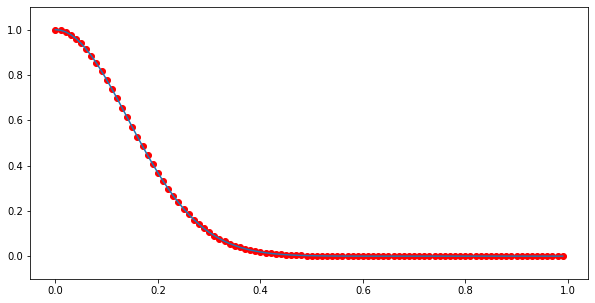

In [2]:
xs = np.arange(0, 1, 0.01)
ys = np.exp(-25 * xs **2)

plt.figure(figsize=(10, 5))
plt.scatter(xs, ys, c='r')
plt.plot(xs, ys)
plt.ylim(-0.1, 1.1)

In [3]:
def left_pseudoinverse(X):
    return np.linalg.inv(X.T @ X) @ X.T

In [4]:
MAX_ORDER = 10

xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.5,
                                                                random_state=13)


poly_features = PolynomialFeatures(degree=MAX_ORDER, include_bias=False)
X_train = poly_features.fit_transform(xs_train.reshape(-1, 1))
X_test = poly_features.fit_transform(xs_test.reshape(-1, 1))

shift_x = X_train.mean(axis=0).reshape((1, -1))
X_train = X_train - shift_x
X_test = X_test - shift_x

shift_y = ys_train.mean()
ys_train -= shift_y
ys_test -= shift_y

In [5]:
ws = left_pseudoinverse(X_train) @ ys_train

y_train_predicted = X_train @ ws
print('Train MSE', mean_squared_error(y_train_predicted, ys_train))

y_test_predicted = X_test @ ws
print('Test MSE', mean_squared_error(y_test_predicted, ys_test))

Train MSE 6.337351712266053e-08
Test MSE 3.463326622213883e-07


<AxesSubplot:>

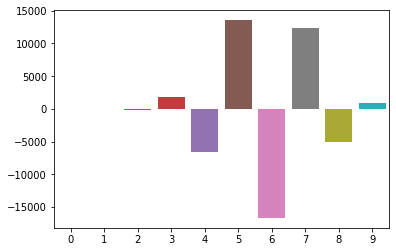

In [6]:
import seaborn as sns
sns.barplot(x = np.arange(len(ws)),y = ws)

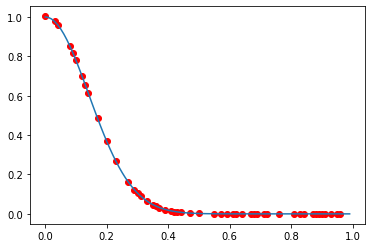

In [7]:
plt.plot(xs, ys)
plt.scatter(xs_test, y_test_predicted + shift_y, c = 'r')

In [8]:
# Добавляем дублирование столбца с некоторым шумом

new_feature = X_train[:, 7] + np.random.normal(0, 1e-15, X_train.shape[0])
X_train_extended = np.hstack([X_train, new_feature.reshape(-1, 1)])

new_feature_test = X_test[:, 7] + np.random.normal(0, 1e-15, X_train.shape[0])
X_test_extended = np.hstack([X_test, new_feature_test.reshape(-1, 1)])

In [9]:
ws = left_pseudoinverse(X_train_extended) @ ys_train

y_train_predicted = X_train_extended @ ws
print('Train MSE', mean_squared_error(y_train_predicted, ys_train))

y_test_predicted = X_test_extended @ ws
print('Test MSE', mean_squared_error(y_test_predicted, ys_test))

Train MSE 1.1399899700893643e-05
Test MSE 1.2778523803392552e-05


<AxesSubplot:>

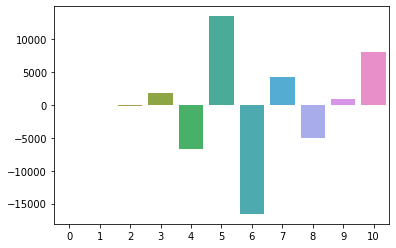

In [10]:
sns.barplot(x = np.arange(len(ws)),y = ws)

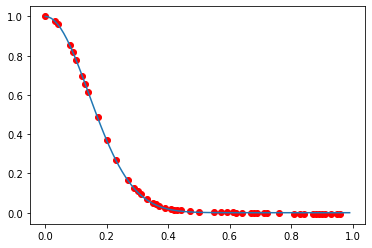

In [11]:
plt.plot(xs, ys)
plt.scatter(xs_test, y_test_predicted + shift_y, c = 'r')

In [12]:
# Попробуем применить PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

PCA()

[5.42930847e+00 1.58011901e+00 4.01541980e-01 9.08536185e-02
 1.93815741e-02 3.22701815e-03 4.96705370e-04 6.13426808e-05
 5.65216708e-06 3.43958925e-07]
10 singular values


<AxesSubplot:>

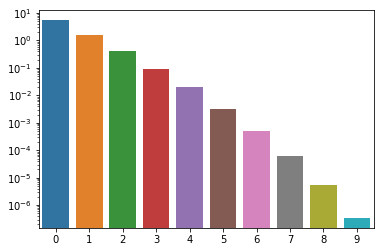

In [14]:
# Cингулярные числа тестовой выборки без дублирования столбца

sing_values = pca.singular_values_
print (sing_values)
print(len(pca.singular_values_), 'singular values')

sns.barplot(x = np.arange(len(sing_values)), y = sing_values, log = True)

### Пример с дублированным признаков

[5.64055380e+00 1.63974202e+00 4.07079305e-01 9.08626154e-02
 1.99516658e-02 3.40655047e-03 5.07725864e-04 6.15952714e-05
 6.08541674e-06 3.70572878e-07 4.27785041e-15]
11 singular values


<AxesSubplot:>

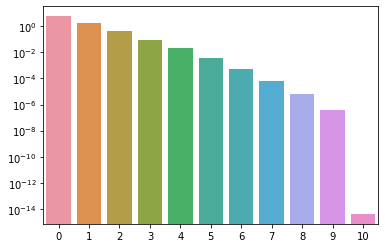

In [15]:
# Cингулярные числа выборки c дублированным столбцом

pca.fit(X_train_extended)

sing_values = pca.singular_values_
print (sing_values)
print(len(pca.singular_values_), 'singular values')

sns.barplot(x = np.arange(len(sing_values)), y = sing_values, log = True)

In [16]:
# PCA из sklearn делает преобразование за нас

pca = PCA(n_components=9)
pca.fit(X_train_extended)

X_train_reduced = pca.transform(X_train_extended)
X_test_reduced = pca.transform(X_test_extended)

In [17]:
ws = left_pseudoinverse(X_train_reduced) @ ys_train

y_train_predicted = X_train_reduced @ ws
print('Train MSE', mean_squared_error(y_train_predicted, ys_train))

y_test_predicted = X_test_reduced @ ws
print('Test MSE', mean_squared_error(y_test_predicted, ys_test))

Train MSE 1.7321902041433395e-06
Test MSE 3.2026529691796606e-06


<AxesSubplot:>

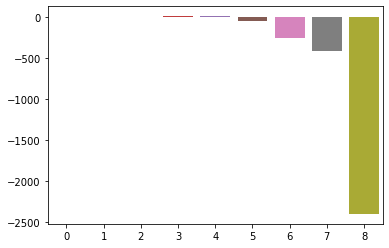

In [18]:
sns.barplot(x = np.arange(len(ws)),y = ws)

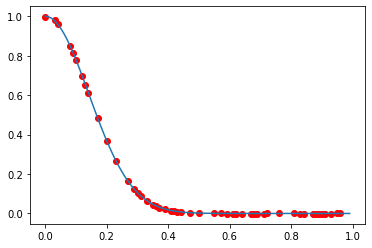

In [19]:
plt.plot(xs, ys)
plt.scatter(xs_test, y_test_predicted + shift_y, c = 'r')

### Пример с переобучением

In [20]:
# Борьба с переобучением
# Переобучение

MAX_ORDER = 20 # сделаем 20, а не 10

xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.5,
                                                                random_state=13)


poly_features = PolynomialFeatures(degree=MAX_ORDER, include_bias=False)
X_train = poly_features.fit_transform(xs_train.reshape(-1, 1))
X_test = poly_features.fit_transform(xs_test.reshape(-1, 1))

shift_x = X_train.mean(axis=0).reshape((1, -1))
X_train = X_train - shift_x
X_test = X_test - shift_x

shift_y = ys_train.mean()
ys_train -= shift_y
ys_test -= shift_y



ws = left_pseudoinverse(X_train) @ ys_train

y_train_predicted = X_train @ ws
print('Train MSE', mean_squared_error(y_train_predicted, ys_train))

y_test_predicted = X_test @ ws
print('Test MSE', mean_squared_error(y_test_predicted, ys_test))

Train MSE 0.00305986001483163
Test MSE 0.0028934635544602978


<AxesSubplot:>

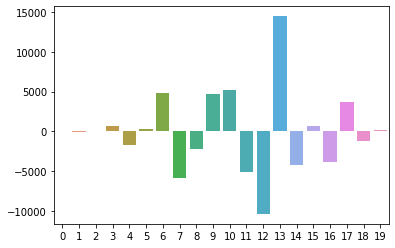

In [21]:
sns.barplot(x = np.arange(len(ws)),y = ws)

Явно видим переобучение


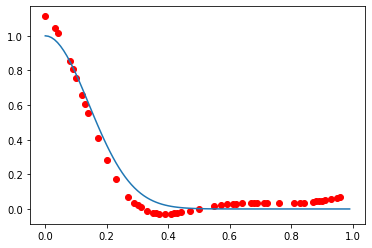

In [22]:
plt.plot(xs, ys)
plt.scatter(xs_test, y_test_predicted + shift_y, c = 'r')
print('Явно видим переобучение')

In [23]:
# Преобразуем к главным компонентам и обучим заного. Можно также оценить, насколько влияет обрезка значений

pca = PCA(n_components=10)
pca.fit(X_train)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)



ws = left_pseudoinverse(X_train_reduced) @ ys_train

y_train_predicted = X_train_reduced @ ws
print('Train MSE', mean_squared_error(y_train_predicted, ys_train))

y_test_predicted = X_test_reduced @ ws
print('Test MSE', mean_squared_error(y_test_predicted, ys_test))

Train MSE 2.893527757595875e-06
Test MSE 6.2063184339233985e-06


<AxesSubplot:>

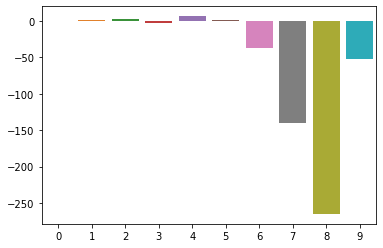

In [24]:
sns.barplot(x = np.arange(len(ws)), y = ws)

Срезка ненужных признаков помогла получить хорошую аппроксимацию


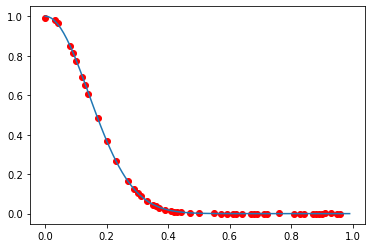

In [25]:
plt.plot(xs, ys)
plt.scatter(xs_test, y_test_predicted + shift_y, c = 'r')
print('Срезка ненужных признаков помогла получить хорошую аппроксимацию')

### Пример с сжатием изображения с исползьзование сингулярного разложения

Для плотных матриц требуется хранить $N^2$ элементов. Аппроксимация ранга r (метод главных компонент) может уменьшить это число O($N_r$) . В качестве примера рассмотрим сжатие изображений.

In [26]:
#!pip install scikit-image

from skimage import data
from skimage.color import rgb2gray
from numpy.linalg import svd
from skimage import img_as_float

In [27]:
cat = rgb2gray(img_as_float(data.chelsea())) 
cat.shape

(300, 451)

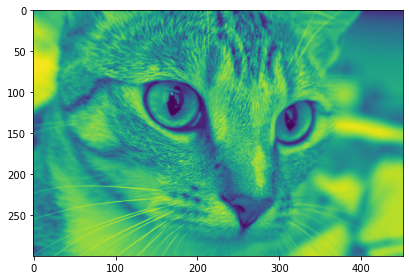

In [28]:
plt.imshow(cat)
plt.tight_layout()

In [48]:
U, s, Vc = svd(cat, full_matrices=False)
def compress_and_show(k):
    os = cat.shape
    cat_compressed = U[:,:k] @ np.diag(s[:k]) @ Vc[:k,:]
    compression_ratio = 100.0* (k*(os[0] + os[1])+k)/(os[0]*os[1])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    plt.imshow(cat_compressed)
    plt.axis('off')
    plt.tight_layout()
    return cat_compressed

(300, 451)

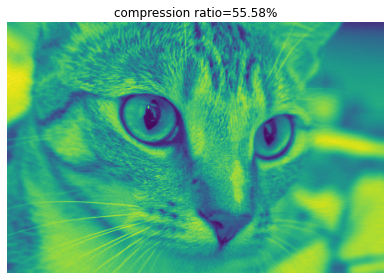

In [49]:
cat_compressed = compress_and_show(100)
cat_compressed.shape

In [50]:
from ipywidgets import interact

@interact(b=(1, 100))
def on_value_change(b):
    compress_and_show(b)

interactive(children=(IntSlider(value=50, description='b', min=1), Output()), _dom_classes=('widget-interact',…

### Пример уменьшения размерности данных с помощью PCA: набор данных Wine

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [33]:
wine = load_wine() # будем визуализировать сорта винограда (красный, зелёный, синий) по химическому составу вин (13 характеристик)

# Признаков 13, что очень много для визуализации на двумерном экране...

A = wine['data']
print(wine['data'].shape, "\n")

labels = wine['target']
print(labels)

classes = [0, 1, 2]
colors = ['red', 'green', 'blue']

(178, 13) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [34]:
# data standardization
A_std = StandardScaler().fit_transform(A)

In [35]:
A_std[:10,:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254],
       [ 0.24628963, -0.49941338, -0.82799632],
       [ 0.19687903,  0.02123125,  1.10933436],
       [ 1.69154964, -0.34681064,  0.4879264 ],
       [ 0.29570023,  0.22769377,  1.84040254],
       [ 1.48155459, -0.51736664,  0.30515936],
       [ 1.71625494, -0.4186237 ,  0.30515936],
       [ 1.3086175 , -0.16727801,  0.89001391],
       [ 2.25977152, -0.62508622, -0.7183361 ],
       [ 1.0615645 , -0.88540853, -0.352802  ]])

Как мы можем визуально проверить набор данных? Напомним, что у нас есть 178 точек данных в 13-мерном пространстве. Что, если мы каким-то случайным образом уменьшим размерность? Давайте выберем два случайных признака и визуализируем в 2d.

In [36]:
rank = 2
ix = np.random.choice(A.shape[1], 2, replace=False)
print(ix)

[4 5]


In [37]:
def inspect_projections(projections):
    for label, colour in zip(classes, colors):
        plt.scatter(projections[labels == label, 0],
                    projections[labels == label, 1],
                    label = label,
                    c = colour)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

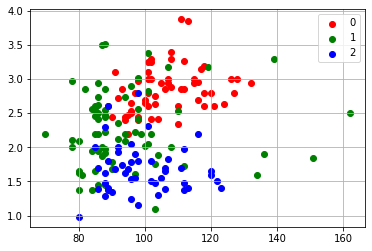

In [38]:
rnd_projections = A[:, ix]
inspect_projections(rnd_projections)

Как-то не особо понятно, что происходит и как вообще разделять...

Нужен метод главных компонент!

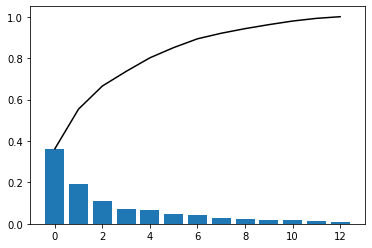

In [39]:
# Используем PCA для проекции на 2 признака

u, s, wh = np.linalg.svd(A_std)
cum_s = np.cumsum(s**2)
plt.plot(cum_s/cum_s[-1], color = 'black')
plt.bar(x=np.arange(len(s)), height=s**2/cum_s[-1]);

Спроецируем на главные компоненты: $A \longrightarrow U \Sigma$

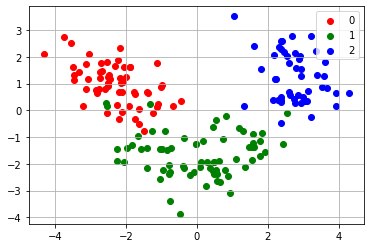

In [40]:
projections = u[:,:rank] @ np.diag(s[:rank])
inspect_projections(projections)

Понятно, что прогнозы, полученные с помощью SVD, гораздо лучше отражают разнообразие данных, чем просто два случайных столбца. Полученные проекции можно передать вашему любимому алгоритму классификации. В этом случае мы свели (самостоятельно) данные в 13-мерном пространстве к данным в 2-мерном пространстве!